In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')


In [2]:
print(list(df.columns))


['Filepath', 'FolderHierarchy', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'PatientWeight', 'StudyDate', 'StudyTime', 'AccessionNumber', 'StudyInstanceUID', 'StudyDescription', 'Filename', 'Modality', 'SeriesNumber', 'InstanceNumber', 'Rows', 'Columns', 'PixelSpacing', 'SliceThickness', 'SpacingBetweenSlices', 'ImagePositionPatient', 'ImageOrientationPatient', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'SamplesPerPixel', 'PhotometricInterpretation', 'WindowCenter', 'WindowWidth', 'BodyPartExamined', 'ProtocolName', 'ScanningSequence', 'SequenceVariant', 'ScanOptions', 'Manufacturer', 'ManufacturerModelName', 'StationName', 'SoftwareVersions', 'ValidationStatus', 'ValidationMessage', 'CT_KVP', 'CT_XRayTubeCurrent', 'CT_ExposureTime', 'CT_Exposure', 'CT_ExposureInuAs', 'CT_CTDIvol', 'CT_DLP', 'CT_ConvolutionKernel', 'CT_AcquisitionType', 'CT_DataCollectionDiameter', 'CT_ReconstructionDiameter', 'CT_DistanceSourceToDetector', 'CT_Dist

In [3]:
import pandas as pd
import numpy as np

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# -----------------------
# 1. Total patients
# -----------------------

# Count total unique patients in the dataset
total_patients = df['PatientID'].nunique()
print("Total unique patients:", total_patients)

# -----------------------
# 2. Age/Sex Distribution
# -----------------------
# Typically, in DICOM metadata, PatientAge can appear in the form '034Y' (meaning 34 years).
# If so, we strip out the trailing 'Y' (or other possible character) and convert to numeric.

# Clean up 'PatientAge' to extract the numeric part if it contains strings like '034Y', '45Y', etc.
df['NumericAge'] = (df['PatientAge']
                    .astype(str)
                    .str.extract(r'(\d+)')        # Extract the digits (e.g. 034 from '034Y')
                    .astype(float))               # Convert to float

# Now you can get descriptive statistics of age
age_stats = df['NumericAge'].describe()
print("\nAge Statistics (years):")
print(age_stats)

# Check the sex distribution
sex_distribution = df['PatientSex'].value_counts(dropna=False)
print("\nSex Distribution:")
print(sex_distribution)

# -----------------------
# 3. Modality Split (CT vs MRI)
# -----------------------
# Count the occurrences of each modality in the 'Modality' column
modality_counts = df['Modality'].value_counts(dropna=False)
print("\nModality Distribution:")
print(modality_counts)

# -----------------------
# (Optional) Additional Grouped Insights
# -----------------------
# If you want to break down the number of patients per sex, per modality, etc.
# you can do group-bys such as:

# Group by 'PatientSex' and 'Modality' and count unique patients
grouped_counts = (df.groupby(['PatientSex', 'Modality'])['PatientID']
                  .nunique()
                  .reset_index(name='UniquePatientCount'))

print("\nBreakdown by Sex and Modality:")
print(grouped_counts)


Total unique patients: 100

Age Statistics (years):
count    123.000000
mean       7.560976
std        6.271385
min        0.000000
25%        2.000000
50%        6.000000
75%       11.000000
max       30.000000
Name: NumericAge, dtype: float64

Sex Distribution:
PatientSex
M    194
F    145
Name: count, dtype: int64

Modality Distribution:
Modality
CR    225
CT     98
MR     13
PR      2
DX      1
Name: count, dtype: int64

Breakdown by Sex and Modality:
  PatientSex Modality  UniquePatientCount
0          F       CR                   9
1          F       CT                  42
2          F       DX                   1
3          F       MR                   7
4          F       PR                   1
5          M       CR                  10
6          M       CT                  45
7          M       MR                   6
8          M       PR                   1


Total unique patients: 100

Age Statistics (years):
count    123.000000
mean       7.560976
std        6.271385
min        0.000000
25%        2.000000
50%        6.000000
75%       11.000000
max       30.000000
Name: NumericAge, dtype: float64

Sex Distribution:
PatientSex
M    194
F    145
Name: count, dtype: int64

Modality Distribution:
Modality
CR    225
CT     98
MR     13
PR      2
DX      1
Name: count, dtype: int64


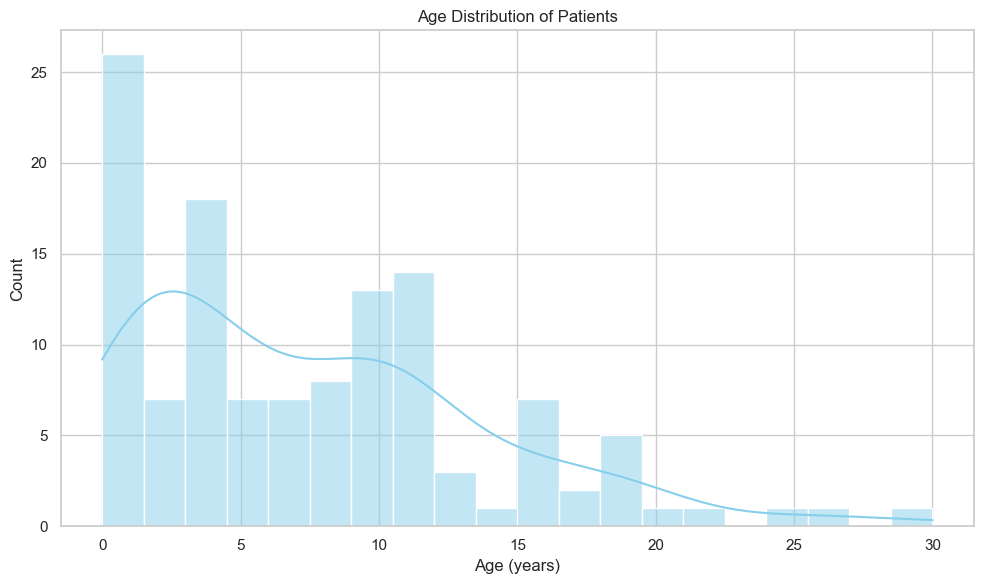

C:\Users\musab\AppData\Local\Temp\ipykernel_1820\457191030.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_counts, x='PatientSex', y='Count', palette="pastel")


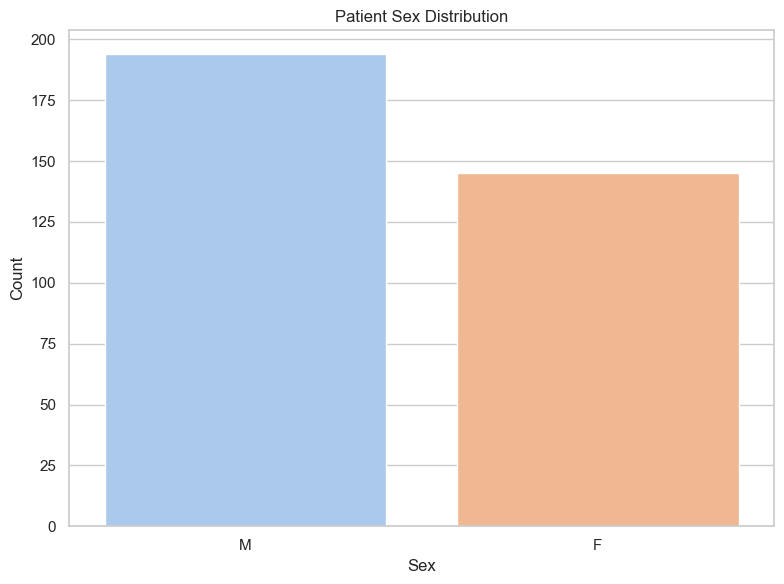

C:\Users\musab\AppData\Local\Temp\ipykernel_1820\457191030.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=modality_counts_df, x='Modality', y='Count', palette="deep")


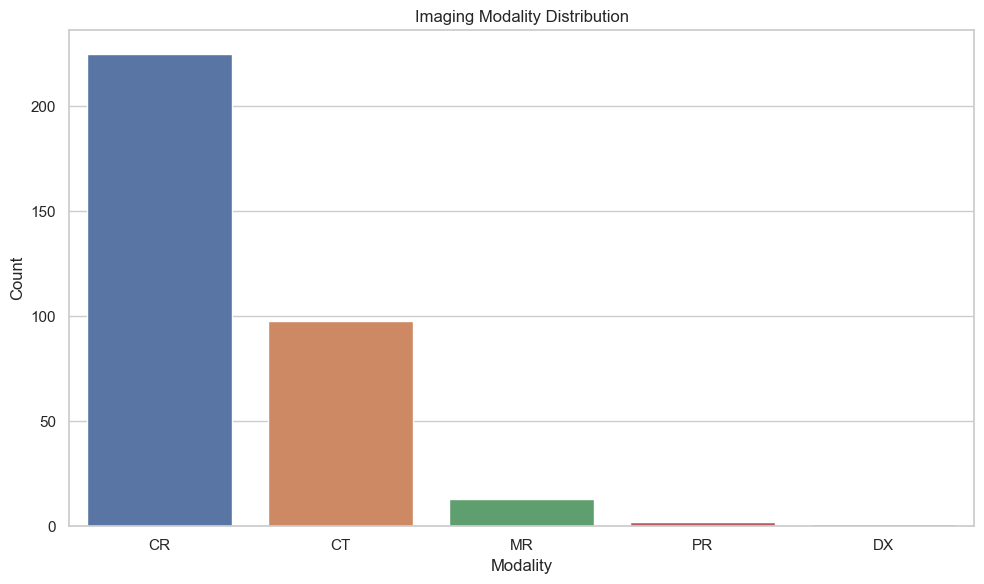

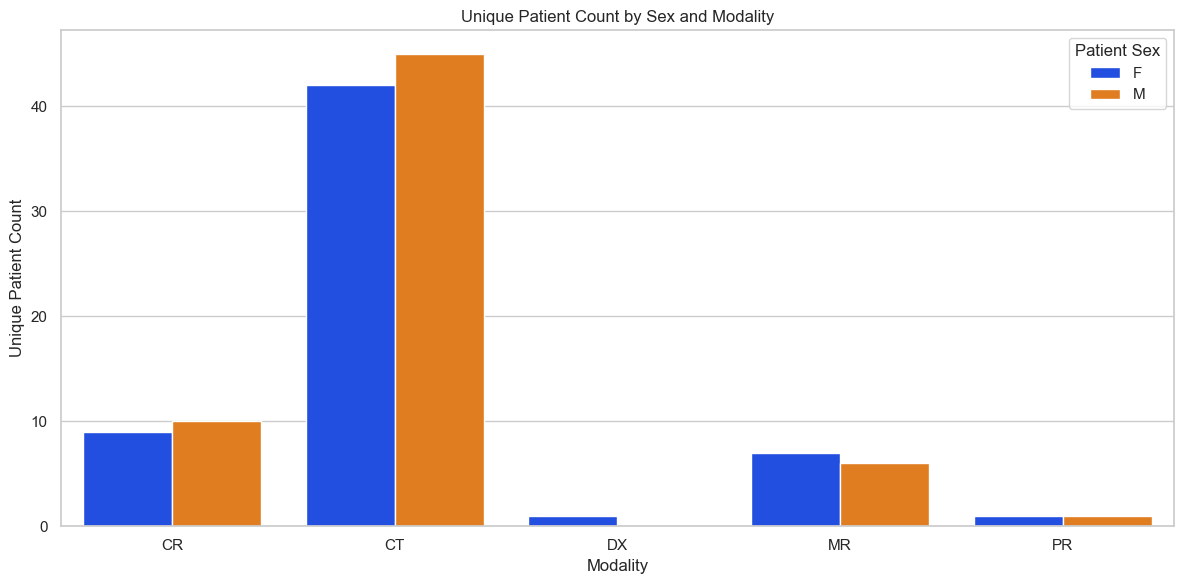

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter notebooks, enable inline plotting:
# %matplotlib inline  

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# -----------------------
# 1. Total Patients
# -----------------------
total_patients = df['PatientID'].nunique()
print("Total unique patients:", total_patients)

# -----------------------
# 2. Age/Sex Distribution
# -----------------------
# Extract the numeric part of the PatientAge (e.g., '034Y' becomes 34).
df['NumericAge'] = (
    df['PatientAge']
    .astype(str)
    .str.extract(r'(\d+)')  # Extract digits
    .astype(float)
)

# Compute age statistics
age_stats = df['NumericAge'].describe()
print("\nAge Statistics (years):")
print(age_stats)

# Sex distribution
sex_distribution = df['PatientSex'].value_counts(dropna=False)
print("\nSex Distribution:")
print(sex_distribution)

# -----------------------
# 3. Modality Split (CT vs MRI)
# -----------------------
modality_counts = df['Modality'].value_counts(dropna=False)
print("\nModality Distribution:")
print(modality_counts)

# -----------------------
# 4. Visualization
# -----------------------

# Set style for Seaborn
sns.set(style="whitegrid", palette="muted")

# --- Visualizing Age Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['NumericAge'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Visualizing Sex Distribution ---
plt.figure(figsize=(8, 6))
sex_counts = sex_distribution.reset_index()
sex_counts.columns = ['PatientSex', 'Count']
sns.barplot(data=sex_counts, x='PatientSex', y='Count', palette="pastel")
plt.title("Patient Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Visualizing Modality Distribution (CT vs. MRI) ---
plt.figure(figsize=(10, 6))
modality_counts_df = modality_counts.reset_index()
modality_counts_df.columns = ['Modality', 'Count']
sns.barplot(data=modality_counts_df, x='Modality', y='Count', palette="deep")
plt.title("Imaging Modality Distribution")
plt.xlabel("Modality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Optional: Grouped Insights (Sex vs. Modality) ---
# Group by PatientSex and Modality to count unique patients
grouped_counts = (df.groupby(['PatientSex', 'Modality'])['PatientID']
                  .nunique()
                  .reset_index(name='UniquePatientCount'))

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_counts, x='Modality', y='UniquePatientCount', hue='PatientSex', palette="bright")
plt.title("Unique Patient Count by Sex and Modality")
plt.xlabel("Modality")
plt.ylabel("Unique Patient Count")
plt.legend(title="Patient Sex")
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# Get list of unique patient IDs
unique_patients = df['PatientID'].unique()

# Iterate through each patient and only process those that have MRI scans.
for patient in unique_patients:
    # Filter the data for the current patient
    patient_df = df[df['PatientID'] == patient]
    # Filter for MRI scans (if modality is either 'MR' or 'MRI')
    mri_df = patient_df[patient_df['Modality'].isin(['MR', 'MRI'])]
    
    # Only print if there is at least one MRI record for the patient
    if not mri_df.empty:
        print(f"PatientID: {patient}")
        print("  MRI scans folder hierarchy:")
        for idx, row in mri_df.iterrows():
            print(f"    FolderHierarchy: {row['FolderHierarchy']}  |  Modality: {row['Modality']}")
        print("-" * 60)


PatientID: 70104314
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-10\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 70080273
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-12\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 70130494
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-13\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 70091400
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-14 (Metehan Beyazyüz)\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 13318209
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-3\ST000001\SE000013  |  Modality: MR
------------------------------------------------------------
PatientID: 70094651
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-5\SE000029  |  Moda